# **Problem Statement: Gradient Boosting and XGBoost**

Write a Python program that reads the bank_data.csv(provided on LMS) file into  a  DataFrame,  the  following  are  the  tasks  that  are  to  be  done  while constructing   Gradient   Boosting   and   XGBoost   model,   and   compare   their accuracy.

1.Load the given dataset into a DataFrame

2.Find missing values and treat them

 3.Observe distribution of target variable (‘y’ is our target variable)

 4.Check data types for all features

 5.Do label encoding for all categorical features

 6.Extract independent and dependent variables into the x & y DataFrame

 7.Split your data into train and test, by 30%as test size

 8.Build a Gradient boosting classifier model and XGBoost model and compare their accuracy


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


**1.Load the given dataset into a DataFrame**

In [ ]:
df=pd.read_csv('/content/bank_data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



**2.Find missing values and treat them**

In [ ]:
df.isnull().sum().sum()

0


 **3.Observe distribution of target variable (‘y’ is our target variable)**

In [ ]:
target_ratio=pd.DataFrame(({'Counts':df.y.value_counts(),'Percentage':df.y.value_counts()/len(df)}))
target_ratio

,Counts,Percentage
no,36548,0.887346
yes,4640,0.112654



 **4.Check data types for all features**

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


 **5.Do label encoding for all categorical features**


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0




 **6.Extract independent and dependent variables into the x & y DataFrame**

In [ ]:
x=df.drop(['y','marital','education','default','housing','loan','contact','month','day_of_week'],axis=1)
y=df.y



 **7.Split your data into train and test, by 30%as test size**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)


 **8.Build a Gradient boosting classifier model and XGBoost model and compare their accuracy**

In [ ]:
gb_clf=GradientBoostingClassifier(learning_rate=0.5,n_estimators=1000)
gb_clf.fit(x_train,y_train)
gb_pred=gb_clf.predict(x_test)
print('Gradient decent accuracy score is:\n',round(accuracy_score(y_test,gb_pred),3))

Gradient decent accuracy score is:
 0.907


In [ ]:
xb_clf=XGBClassifier(learning_rate=0.25,n_estimators=100)
xb_clf.fit(x_train,y_train)
xb_pred=xb_clf.predict(x_test)
print('XG boost accuracy score is:\n',round(accuracy_score(y_test,xb_pred),3))

XG boost accuracy score is:
 0.912


In [ ]:
models = ['Gradient Boosting', 'XGBoost']
accuracies = [round(accuracy_score(y_test,gb_pred),3),round(accuracy_score(y_test,xb_pred),3)]

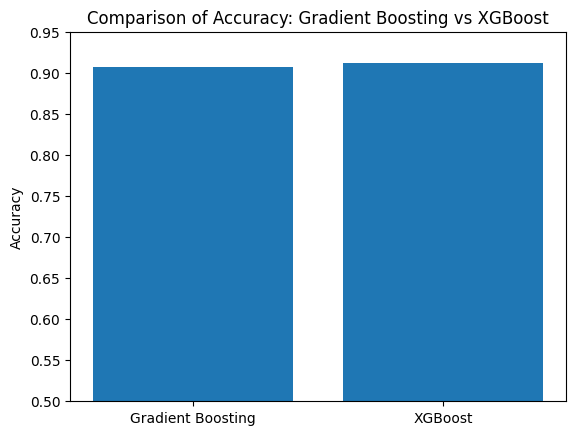

In [ ]:
plt.bar(models, accuracies)
plt.ylim(0.5,0.95)
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy: Gradient Boosting vs XGBoost')
plt.show()